<a href="https://colab.research.google.com/github/ChicagoDataScientist/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
# TODO - code!
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):
  # True Positive Rate 100%
  p_pos_user = 1
  # Prior Probability = prob_drunk_prior
  p_user = prob_drunk_prior
  # False Positive Rate = false_positive_rate
  p_pos_nonuser = false_positive_rate
  # Complement probability of p_user (1 - p_user)
  p_nonuser = 1 - p_user
  (prob_drunk_prior)

  posterior_probability = (p_pos_user*p_user) / ((p_pos_user*p_user) + (p_pos_nonuser*p_nonuser))

# The probabiltiy of a person who tests positive *actually* being a user:
  return ("Posterior Probability", posterior_probability)

In [9]:
# Test 1

prob_drunk_given_positive (1/1000, .08)

('Posterior Probability', 0.012357884330202669)

In [10]:
# Test 2

prob_drunk_given_positive (0.012357884330202669, .08)

('Posterior Probability', 0.13525210993291495)

In [11]:
# Test 3

prob_drunk_given_positive (0.13525210993291495, .08)

('Posterior Probability', 0.6615996951348605)

In [12]:
# Test 4

prob_drunk_given_positive (0.6615996951348605, .08)

('Posterior Probability', 0.9606895076105054)

In [0]:
# You would need to run the test four times to be > 95% sure the person is actually drunk

In [57]:
# Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach

from scipy import stats
import numpy as np

# Set Random Seed for Reproducibility
#np.random.seed(seed=42)

#roll = np.random.binomial(n=6, p=.7, size=10)
#print(roll)

[5 2 4 4 5 5 6 3 4 4]


In [70]:
d1 = np.random.random_integers(1, 6, 1000)
d2 = np.random.random_integers(1, 6, 1000)
dice_roll = d1 + d2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(1, 6 + 1) instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(1, 6 + 1) instead
  


In [71]:
def confidence_interval(data, confidence=.95):
  n=len(data)
  mean = sum(data)/n
  data = np.array(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n-1)
  return (mean, mean-interval, mean+interval)

confidence_interval(dice_roll)

(7.065, 6.91344497892152, 7.216555021078481)

In [0]:
dice_roll_CI = confidence_interval(dice_roll)

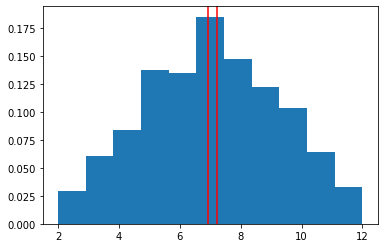

In [73]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(dice_roll, 11, density=True)

plt.axvline(x=dice_roll_CI[1], color='red')
plt.axvline(x=dice_roll_CI[2], color='red')
plt.show()

In [80]:
bayesian_confidence_interval, _, _ = stats.bayes_mvs(dice_roll, alpha=.95)

#BCI = stats.bayes_mvs(dice_roll, alpha=.95)
#BCI
bayesian_confidence_interval

Mean(statistic=7.065, minmax=(6.91344497892152, 7.216555021078481))

In [85]:
bayesian_confidence_interval[1][0]

6.91344497892152

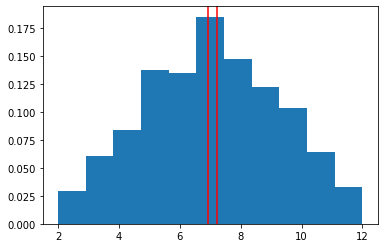

In [86]:
count, bins, ignored = plt.hist(dice_roll, 11, density=True)

plt.axvline(x=bayesian_confidence_interval[1][0], color='red')
plt.axvline(x=bayesian_confidence_interval[1][1], color='red')
plt.show()

**The difference between Bayesian and Frequentist statistics is in how they use probability. Frequentist statistics use probability to model sampling processes.  Bayesian statistics use probability to model sampling as well as other kinds of uncertainty.**

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!